<a href="https://colab.research.google.com/github/ILMNX/machine-learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

## INFO DATASET

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/credit_dataset.csv")
df.head()


,customer_id,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,...,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,NaN,NaN


## EDA

In [ ]:
#Melihat informasi dari dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      8950 non-null   object 
 1   balance_number                   8950 non-null   float64
 2   balance_frequency                8950 non-null   float64
 3   purchases_number                 8950 non-null   float64
 4   purchases_conditional            8950 non-null   float64
 5   purchases_installment            8950 non-null   float64
 6   purchases_cash                   8950 non-null   float64
 7   purchases_frequency              8950 non-null   float64
 8   purchases_frequency_conditional  8950 non-null   float64
 9   purchases_frequency_installment  8950 non-null   float64
 10  purchases_cash_frequency         8950 non-null   float64
 11  purchases_cash_advance           8950 non-null   int64  
 12  p

In [ ]:
#Melihat statistik deskriptif dari dataset
print("Statistik Deskriptif Dari Dataset:")
print(df.describe())

Statistik Deskriptif Dari Dataset:
       balance_number  balance_frequency  purchases_number  \
count     8950.000000        8950.000000       8950.000000   
mean      1564.474828           0.877271       1003.204834   
std       2081.531879           0.236904       2136.634782   
min          0.000000           0.000000          0.000000   
25%        128.281915           0.888889         39.635000   
50%        873.385231           1.000000        361.280000   
75%       2054.140036           1.000000       1110.130000   
max      19043.138560           1.000000      49039.570000   

       purchases_conditional  purchases_installment  purchases_cash  \
count            8950.000000            8950.000000     8950.000000   
mean              592.437371             411.067645      978.871112   
std              1659.887917             904.338115     2097.163877   
min                 0.000000               0.000000        0.000000   
25%                 0.000000               0.000000

##PREPROCESSING

In [ ]:
#Memilih fitur yang akan di drop
df = df.drop(["customer_id", "tax_number", "tax_cash", "tax_total"], axis=1).dropna(axis=1)

In [ ]:
#Melakukan Scaling data dengan Standard scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

##MODELING

In [ ]:
#Menggunakan NearestNeighbors untuk menemukan nilai epsilon yang optimal
nbrs = NearestNeighbors().fit(scaled_data) #membuat objek dengan nbrs
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data) #membuat perhitungan jarak ke tetangga terdekat
k_dist = np.sort(neigh_dist, axis=0)[:, 4]
kneedle = KneeLocator(x=range(1, len(neigh_dist) + 1), y=k_dist, S=1.0, curve="concave", direction="increasing", online=True)

Nilai epsilon yang dihasilkan dari titik knee adalah: 12.963144506369826


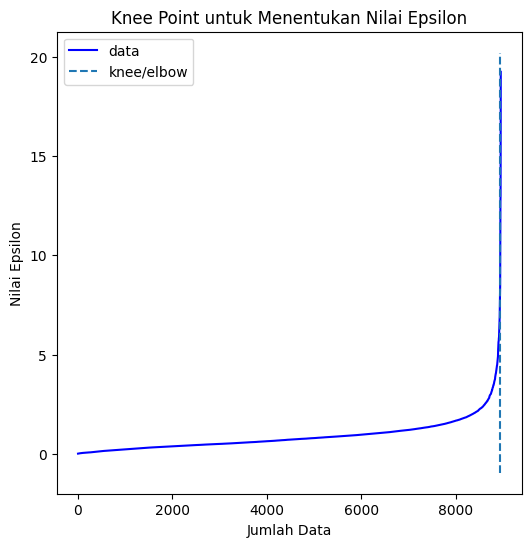

In [ ]:
#Cetak nilai epsilon yang dihasilkan dari knee point
print("Nilai epsilon yang dihasilkan dari titik knee adalah:", kneedle.knee_y)

#Plot knee point
kneedle.plot_knee()
plt.xlabel('Jumlah Data')
plt.ylabel('Nilai Epsilon')
plt.title('Knee Point untuk Menentukan Nilai Epsilon')
plt.show()


In [ ]:
#Melakukan klasterisasi menggunakan DBSCAN
clusters = DBSCAN(eps=kneedle.knee_y, min_samples=12).fit(scaled_data)
labels = clusters.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

##VISUALISASI

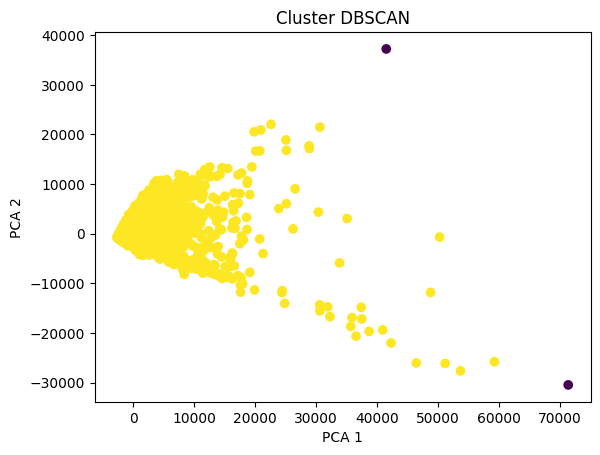

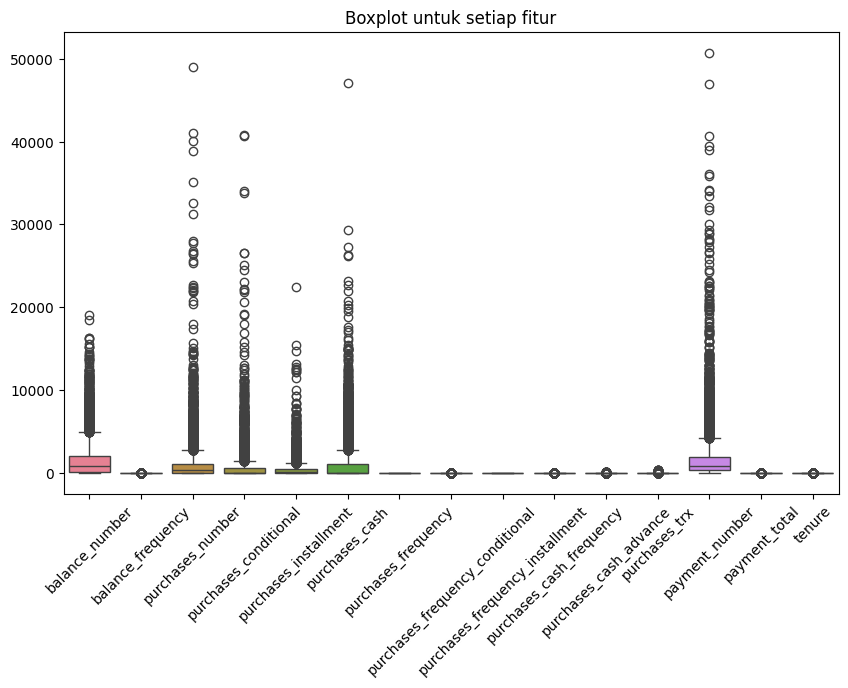

In [ ]:
#Visualisasi Cluster
labels = df["predicted_cluster"]
reduced_data = PCA(n_components=2).fit_transform(df.drop("predicted_cluster", axis=1))
df_reduced_data = pd.DataFrame(reduced_data, columns=["pca1", "pca2"])

plt.scatter(x=df_reduced_data["pca1"], y=df_reduced_data["pca2"], c=df["predicted_cluster"], cmap="viridis")
plt.title("Cluster DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop("predicted_cluster", axis=1))
plt.title('Boxplot untuk setiap fitur')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Mencari silhouette score
silhouette_avg = silhouette_score(df.drop("predicted_cluster", axis=1), labels)
print(f"Akurasi berdasarkan Silhouette score adalah: {silhouette_avg}")

Akurasi berdasarkan Silhouette score adalah: 0.9293632986036102


## KESIMPULAN

**Alasan Pemilihan Metode Algoritma ML:**
Saya memilih DBSCAN karena metode ini bagus untuk menemukan cluster dalam dataset ini yang memiliki kepadatan yang berbeda-beda. DBSCAN juga efisien untuk data besar.

**Metode Evaluasi:**
Saya menggunakan Silhouette Score untuk mengevaluasi model. Karena dengan silhouette score saya bisa melihat seberapa baik cluster yang terbentuk terpisah satu sama lain.

**Hasil Evaluasi Model:**
Silhouette Score dari model DBSCAN yang saya gunakan adalah sekitar 0.9. Yang mana hasil tersebut adalah hasil yang menunjukkan bahwa cluster yang terbentuk cukup baik. Jadi dengan melihat hasil silhouette score yang cukup tinggi, dapat saya simpulkan bahwa metode DBSCAN cukup efisien